Rocky worlds target

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
import astropy.units as u
import importlib
from astropy.modeling import models, fitting



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/gj3929/'
stispath = '/media/david/2tb_ext_hd/hddata/gj3929/hst/stis/'

In [4]:
flts = glob.glob('{}*flt.fits'.format(stispath))
flts

['/media/david/2tb_ext_hd/hddata/gj3929/hst/stis/ofkb07020_flt.fits',
 '/media/david/2tb_ext_hd/hddata/gj3929/hst/stis/ofkb07030_flt.fits',
 '/media/david/2tb_ext_hd/hddata/gj3929/hst/stis/ofkb08020_flt.fits',
 '/media/david/2tb_ext_hd/hddata/gj3929/hst/stis/ofkb08010_flt.fits',
 '/media/david/2tb_ext_hd/hddata/gj3929/hst/stis/ofkb08030_flt.fits']

In [6]:
import stistools
os.environ['oref'] = stispath

/home/david/micromamba/envs/stenv/lib/python3.12/site-packages/stsci/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__('pkg_resources').declare_namespace(__name__)


The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/micromamba/envs/stenv/lib/python3.12/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/micromamba/envs/stenv/lib/python3.12/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


182.01173
186.14545
182.07642
193.91147
193.76282


(1210.0, 1220.0)

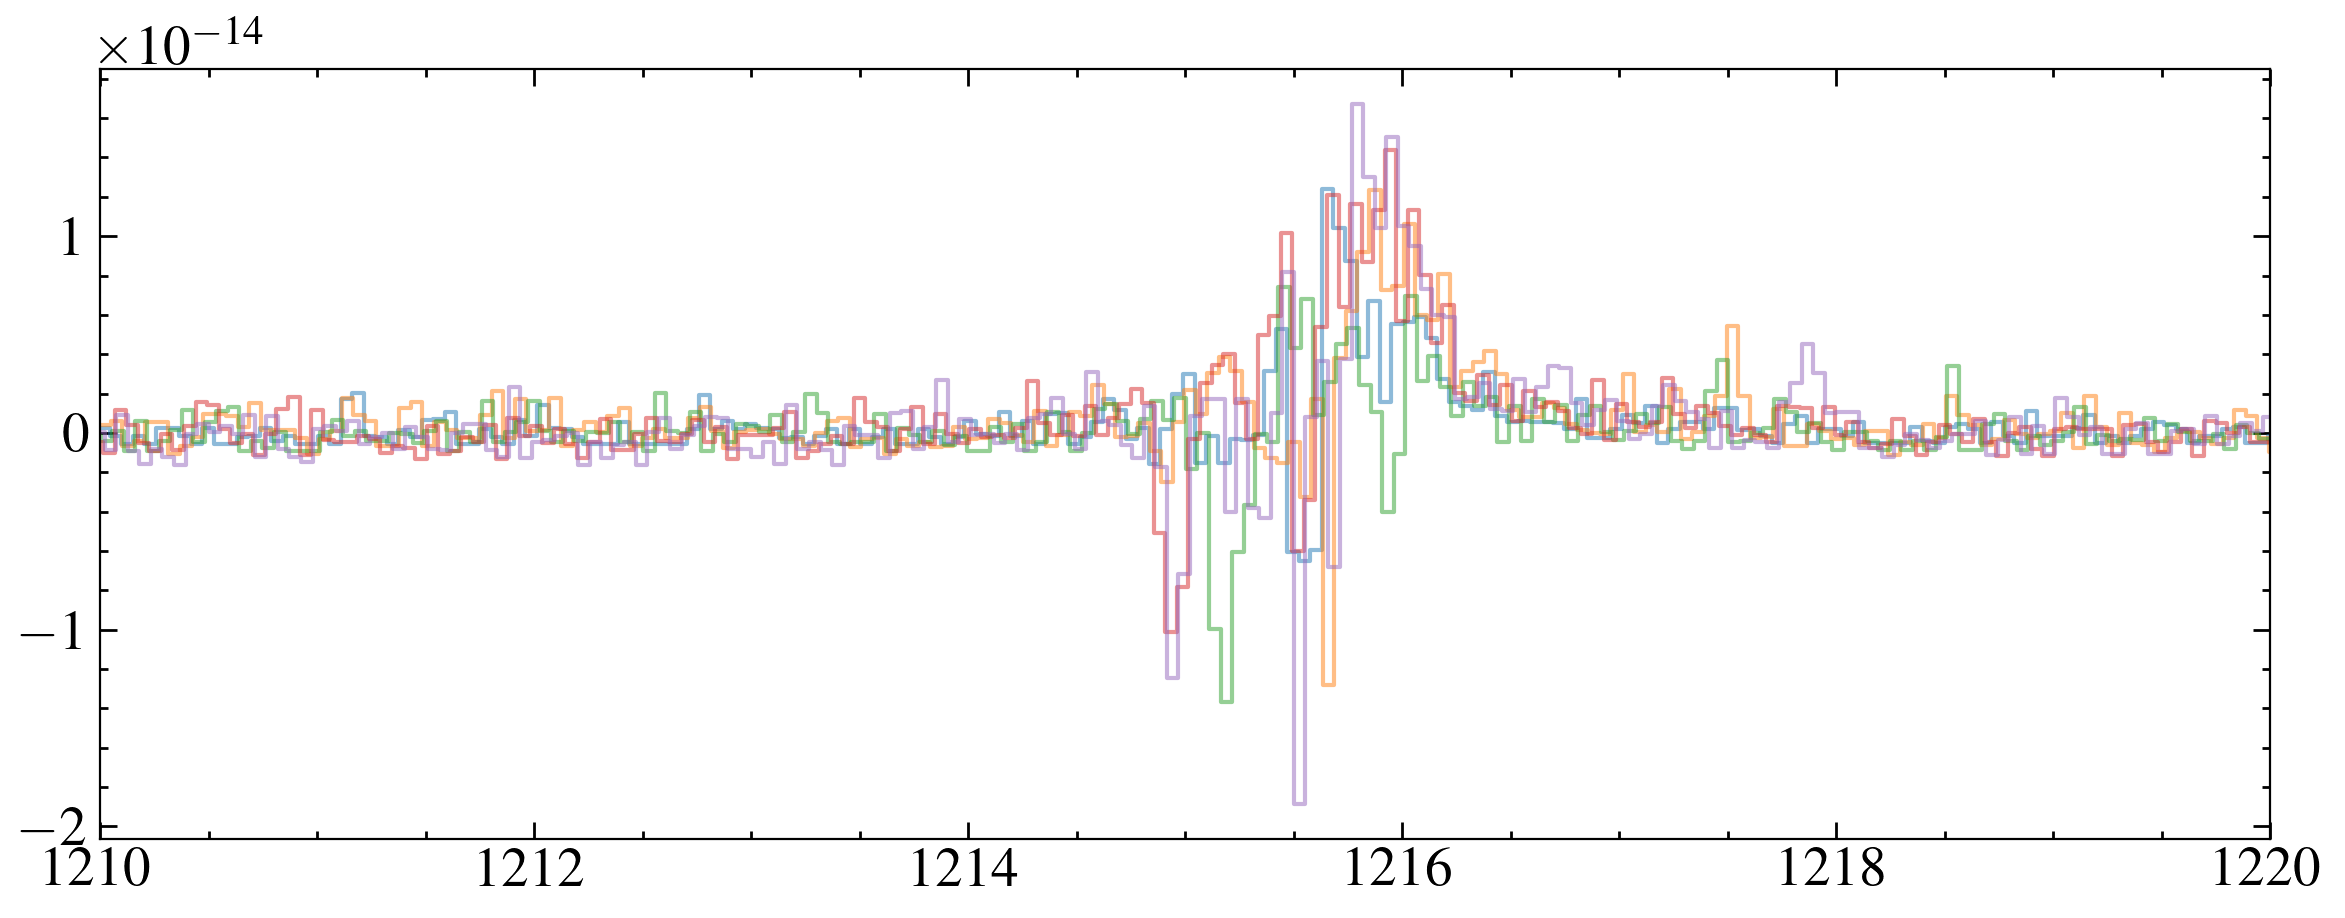

In [176]:
roots = ['ofkb07020', 'ofkb07030', 'ofkb08010','ofkb08020', 'ofkb08030']

fig, ax = plt.subplots()

xs = [410, 410, 412, 410, 410]
ys = [186, 187, 186, 194, 193]
star = 'gj3929'
for i, root in enumerate(roots):
    flt = '{}{}_flt.fits'.format(stispath, root)
    # SPTRCTAB = fits.getheader(flt,0)['SPTRCTAB']
    # grating = fits.getheader(flt,0)['OPT_ELEM']
    # cenwave = fits.getheader(flt,0)['CENWAVE']
    # tracegrid = build_trace_grid(path+SPTRCTAB[5:], grating, cenwave)
    # rootname = fits.getheader(flt)['ROOTNAME'] 
    outname = 'reextractions/{}/{}_new_x1d.fits'.format(star, root)
    if os.path.exists(outname):
        os.remove(outname)
    # a2center = get_a2center(xs[i],ys[i], tracegrid)
    # print(a2center)
    a2center= ys[i]
    stistools.x1d.x1d(flt, output = outname, trailer='reextractions/{}/{}_new.trl'.format(star, root), a2center=a2center, 
                      maxsrch=5, bksmode='median')

    data = fits.getdata('reextractions/{}/{}_new_x1d.fits'.format(star, root), 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    # fig, ax = plt.subplots()
    ax.step(w, f, where='mid', alpha=0.5)
ax.set_xlim(1210, 1220)
    # ax.step(w, e, where='mid', alpha=0.5)

#experimenting with changing maxrch, 5 seeems to be ok

    # ax.step(w, f/e, where='mid')

    # if os.path.exists(outname):
    #     os.remove(outname)
    # # a2center = get_a2center(xs[i],ys[i], tracegrid)
    # # print(a2center)
    # stistools.x1d.x1d(flt, output = outname, trailer='reextractions/{}/{}_new.trl'.format(star, root), a2center=a2center, 
    #                   maxsrch=0, bksmode='median')

    # data = fits.getdata('reextractions/{}/{}_new_x1d.fits'.format(star, root), 1)[0]
    # print(data['A2Center'])
    # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # mask = w > 1160
    # w, f, e = w[mask], f[mask], e[mask]
    # # ax.step(w, f, where='mid', ls='--')
    # ax.step(w, f/e, where='mid', ls='--')
    
    # ax.set_ylim(0, 10)
    
    # ax.step(w, e, where='mid', alpha=0.5)
    # plt.ylim(-0.5e-16, 3e-16)
    # plt.show()


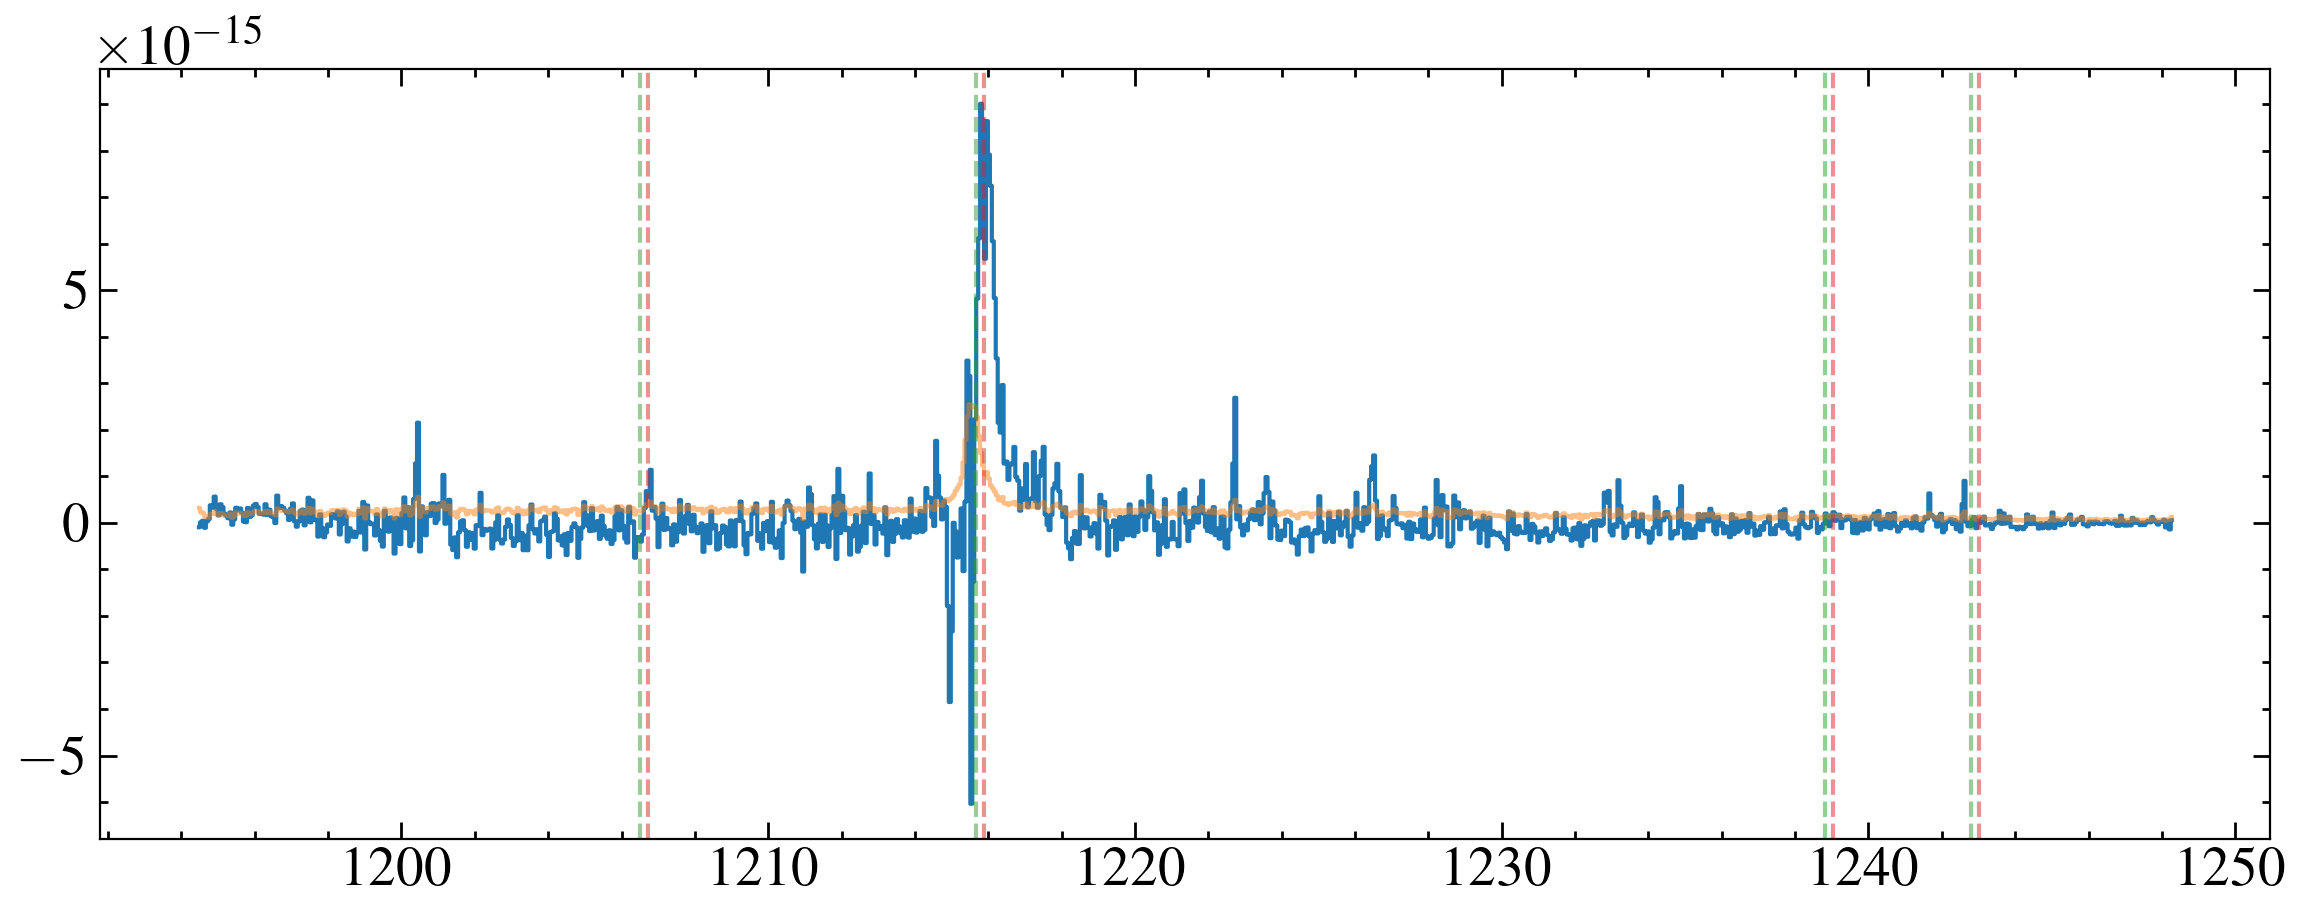

In [51]:
hasp_path = '{}hasp/hst_17904_stis_gj-3929_g140m_ofkb_cspec.fits'.format(stispath)

hasp = fits.getdata(hasp_path, 1)[0]

fig, ax = plt.subplots()

ax.step(hasp['WAVELENGTH'], hasp['FLUX'], where='mid')
ax.step(hasp['WAVELENGTH'], hasp['ERROR'], where='mid', alpha=0.5)

si3 = [1206.51]
nv = [1238.821,1242.804]
lya = [1215.67]
lines = np.hstack((si3, lya, nv))

[ax.axvline(line, ls='--', alpha=0.5, c='C2') for line in lines]
dv_guess = 50*u.km/u.s
lines_shift = dv_guess.to(u.AA, equivalencies = u.doppler_optical(lines*u.AA))
[ax.axvline(line, ls='--', alpha=0.5, c='C3') for line in lines_shift.value]

# ax.set_xlim(1211, 1219)
# ax.set_xlim(1200, 1210)
# ax.set_ylim(-1e-15, 3e-15)

High RV? Simbad says only 10 km/s. Showing off plot

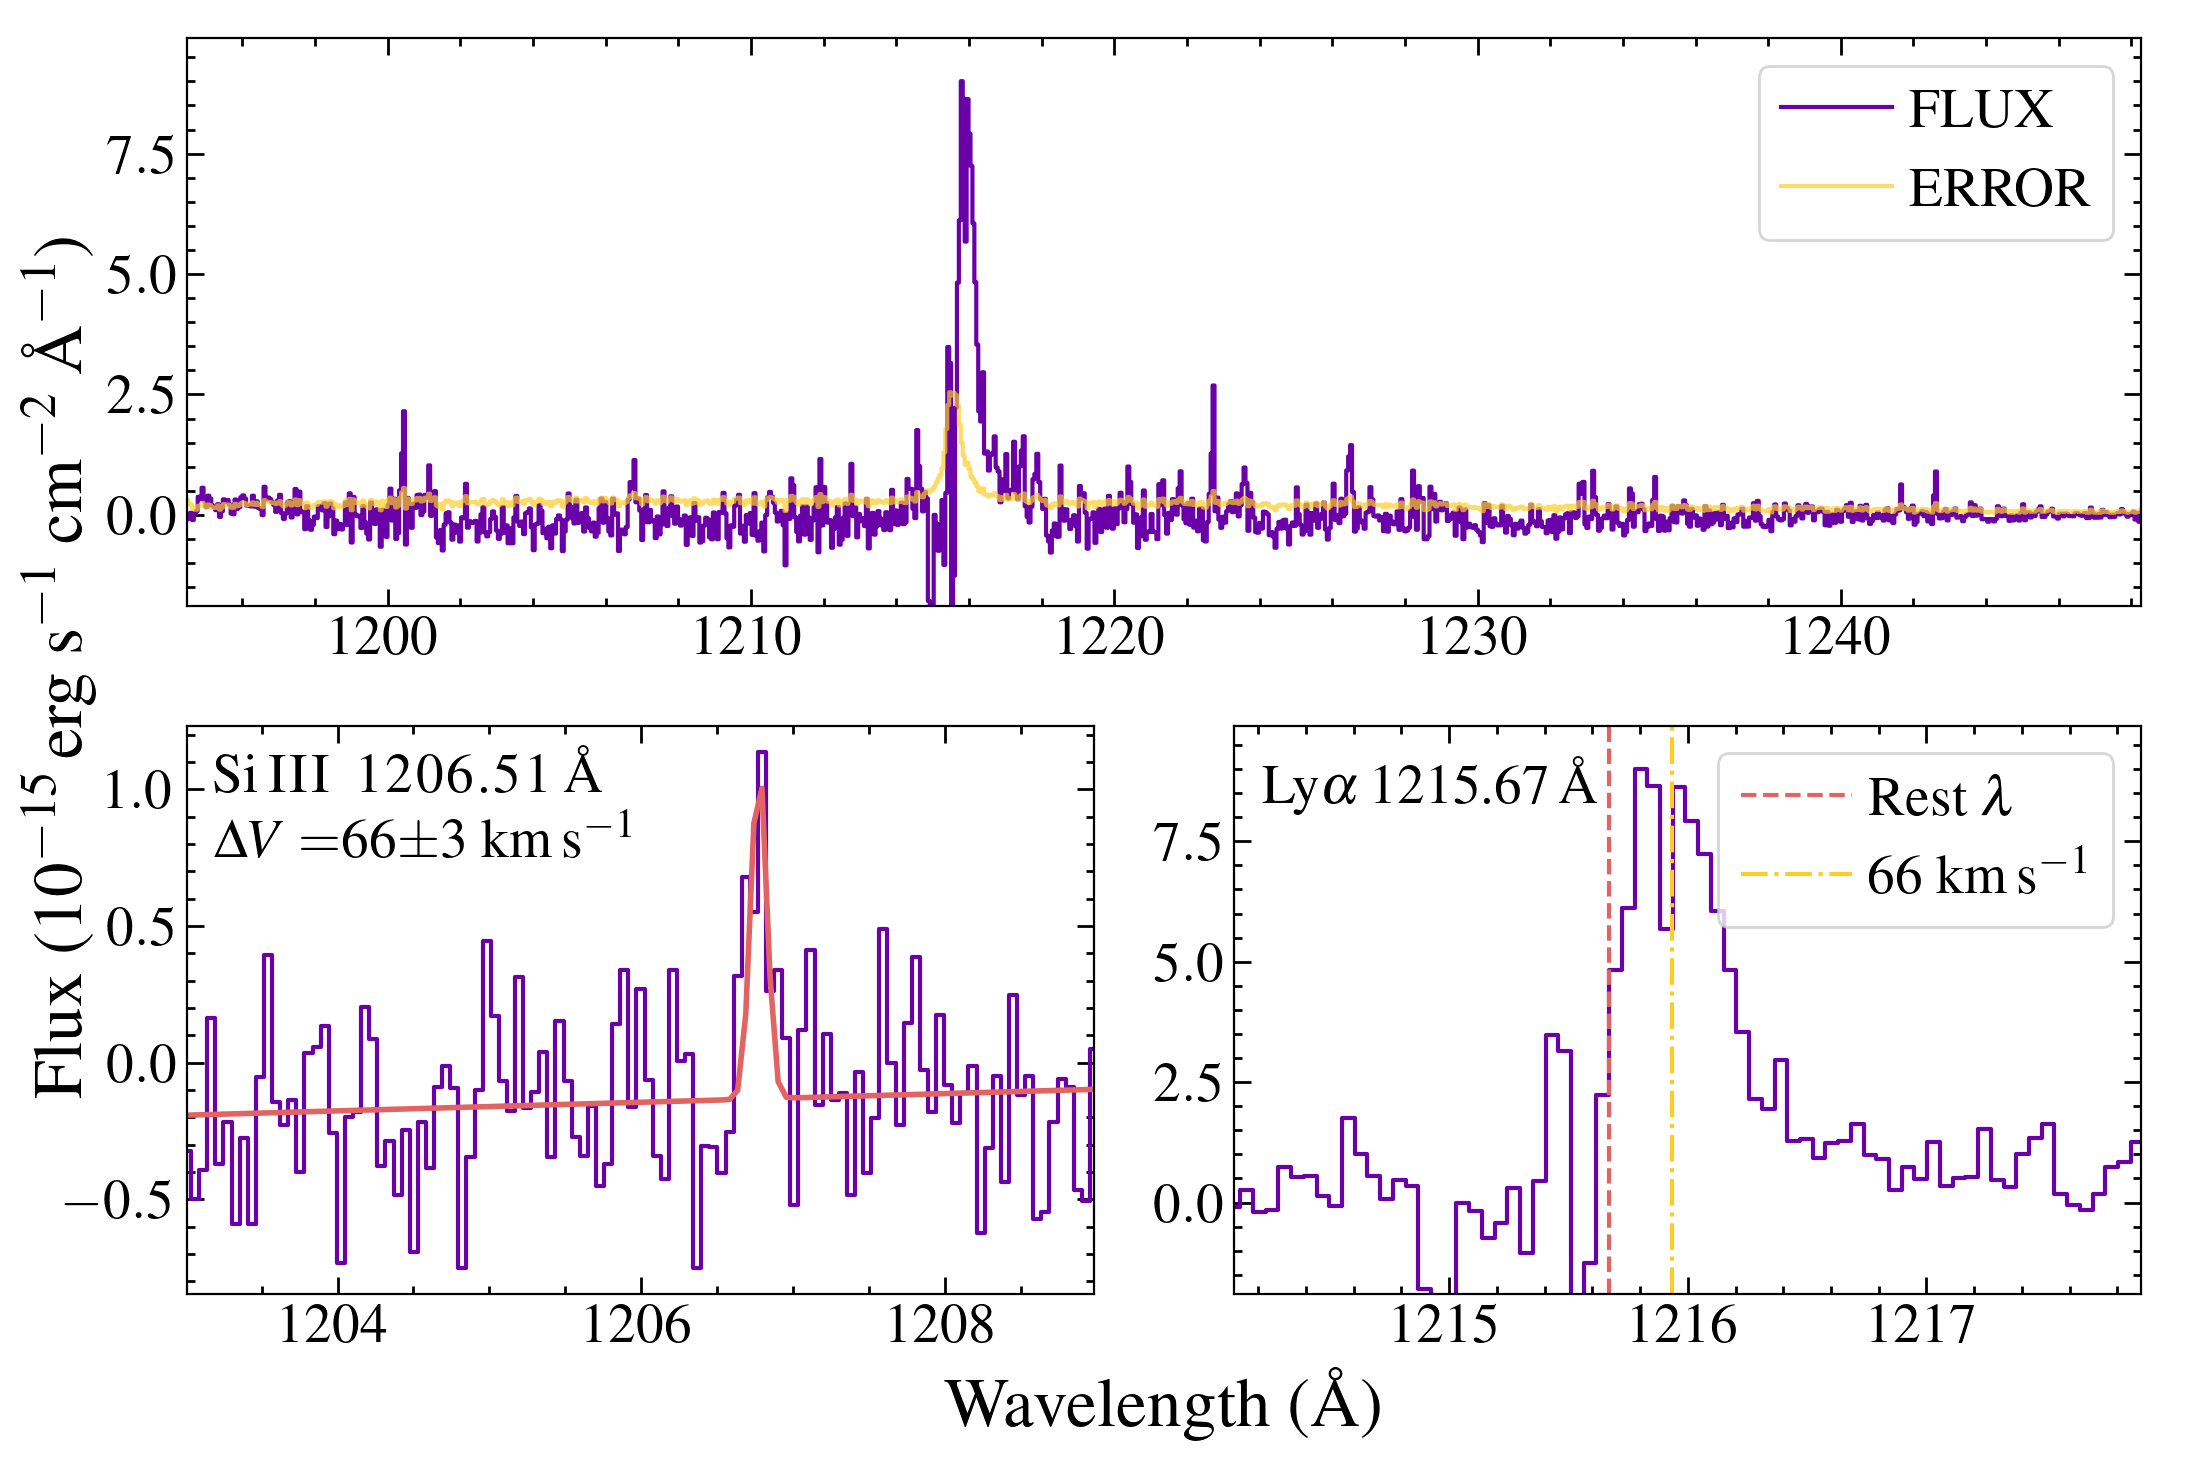

In [172]:


hasp_path = '{}hasp/hst_17904_stis_gj-3929_g140m_ofkb_cspec.fits'.format(stispath)

scale = 1e15

hasp = fits.getdata(hasp_path, 1)[0]
w, f, e = hasp['WAVELENGTH'], hasp['FLUX'], hasp['ERROR'] 

fig, axes = plt.subplot_mosaic([[0, 0],[1, 2]], figsize=(12, 8))

cols = [plt.cm.plasma(0.2), plt.cm.plasma(0.6), plt.cm.plasma(0.9)]

ax0 = axes[0]
ax1 = axes[1]
ax2 = axes[2]

ax0.step(w, f*scale, where='mid', c=cols[0], label='FLUX')
ax0.step(w, e*scale, where='mid', c=cols[2], alpha=0.7, label='ERROR')
ax0.set_xlim(w[0], w[-1])

ax0.set_ylim(-1.9, 9.9)
ax0.legend(frameon=True)

# si3 fit
si3 = 1206.51
# nv = [1238.821,1242.804]
lya = 1215.67

FWHM = 1222/10000
sigma = FWHM / (2 * np.sqrt(2 * np.log(2)))
# print(sigma)

simask = (w > 1203) & (w < 1209)
wsi, fsi, esi = w[simask], f[simask], e[simask] 

ax1.step(wsi, fsi*scale, where='mid', c=cols[0])

fitter = fitting.LevMarLSQFitter(calc_uncertainties=True)

# mod_init = models.Gaussian1D(1e-15, si3+0.1, sigma, fixed=dict(stddev=True))+models.Const1D(0)
mod_init = models.Gaussian1D(1e-15, si3+0.1, sigma, fixed=dict(stddev=True))+models.Polynomial1D(1)
mod_fit = fitter(mod_init, wsi, fsi) 
ax1.plot(wsi, mod_fit(wsi)*scale, c=cols[1], lw=2)

mean, mean_e = mod_fit[0].mean, mod_fit.stds[1]
dv = (mean*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(si3*u.AA))
eup = ((mean+mean_e)*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(si3*u.AA))
edo = ((mean-mean_e)*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(si3*u.AA))

dve = np.mean([(eup-dv).value, (dv-edo).value])
# dv = dv.value

# print(dv, np.mean([(eup-dv).value, (dv-edo).value]))


ax1.set_xlim(wsi[0], wsi[-1])
# ax1.set_ylim()
ax1.annotate(r'Si\,\sc III \,{}\,\AA'.format(si3)+'\n'+ r'$\Delta V = ${:.0f}$\pm${:.0f} km\,s$^{{-1}}$'.format(dv.value, dve), (0.03, 0.95), va='top', xycoords=('axes fraction'))
# ax1.annotate(r'Si III {} \AA '.format(si3), (1204.5, 1.0))

ax2.step(w, f*scale, where='mid', c=cols[0])

ax2.set_xlim(1214.1, 1217.9)
ax2.set_ylim(-1.9, 9.9)

ax2.axvline(lya, c=cols[1], ls='--', label = r'Rest $\lambda$')
lya_shift = dv.to(u.AA, equivalencies = u.doppler_optical(lya*u.AA))
ax2.axvline(lya_shift.value, c=cols[2], ls='-.', label = r'{:.0f} km\,s$^{{-1}}$'.format(dv.value))

ax2.annotate(r'Ly$\alpha$\,{}\,\AA'.format(lya), (0.03, 0.95), va='top', xycoords=('axes fraction'))


ax2.legend(frameon=True)

bigax = fig.add_subplot(111, frame_on=False)
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
bigax.set_xlabel(r'Wavelength (\AA)', size=25)
bigax.set_ylabel(r'Flux (10$^{-15}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25)

fig.tight_layout()

fig.savefig('plots/gj_3929_lya_dv.pdf')

# bigax.set_title(r'$\kappa^1$ Ceti in {}\,s'.format(texp), pad = 20)